# Titanic: Machine Learning from Disaster

The data for this project was obtained from [Kaggle](https://www.kaggle.com/c/titanic). This notebook covers the workflow for solving a data science problem, including Exploratory Data Analysis, Data Cleaning, Feature Engineering, Feature Selection, Machine Learning, etc., in a classification setting.

## Table of contents

1. [Introduction](#introduction)
2. [Required libraries](#reqlib)
3. [Problem definition](#problemdef)
4. [Basic information](#basicinfo)
5. [Exploratory Data Analysis](#eda)
    * [Pclass](#pclass)
    * [Sex](#sex_eda)
    * [Embarked](#embark)
    * [Age](#age_eda)
    * [Fare](#fare_eda)
    * [SibSp](#sibsp)
    * [Parch](#parch)
    * [Age Distribution within classes](#age_pclass)
    * [Breakdown of survival by Sex & Pclass](#sex_pclass)  
<br>
6. [Data Preparation](#dpw)
    * [Missing Values](#missingval)
    * [Converting Categorical Features](#dummy)
    * [Feature Engineering](#feateng)
    * [Assemble training dataset for modelling](#atdm)  
<br>    
7. [Feature Selection](#featsel)
8. [Model Fitting (Machine Learning)](#mfit)
    * [Logistic Regression](#log_model)
    * [Support Vector Machines](#svm_model)
    * [Decision Trees](#dtree_model)
    * [Random Forest](#rfc_model)
    * [K-nearest neighbors](#knn_model)
    * [Cross-validation](#kfcv)  
<br>    
9. [Deployment](#submiss)

## 1. Introduction <a name="introduction"></a>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

The purpose of this project is to analyze what sorts of people were likely to survive. In particular, we'll apply different machine learning algorithms to predict which passengers survived the tragedy.

## 2. Required Libraries <a name="reqlib"></a>

The primary libraries that we'll be using are:

* **NumPy**: adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
* **pandas**: library for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
* **matplotlib**: basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: advanced statistical plotting library.
* **scikit-learn**: Machine Learning package in Python. It features various classification, regression and clustering algorithms.

## 3. Problem Definition <a name="problemdef"></a>

The first step in this project is to understand the problem at hand, to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task.

* **What is the context of the problem and its scientific or business application?**

The problem tackled here is analyzing what sorts of people were likely to survive the Titanic disaster.

* **What type of analytical problem are we trying to solve?**

The goal of this project is to create a predictive model for classifying new passengers as to whether they survived the tragedy or not, so this is a classification task.

For each observation, a (1) is assigned if the passenger survived, and a (0) otherwise.

* **What performance metric are we going to use for this project?**

The score for this project is the percentage of passengers correctly predicted for the test set. This is known simply as "accuracy”.

## 4. Basic Information <a name="basicinfo"></a>

**Let’s have a look at some key information about the variables.**

### Checking the data

The next step is to look at the data we have and understand what each of the variables mean. Let's take a look at the data fields:


* **Pclass**: Passenger's class (1 = 1st, 2 = 2nd, 3 = 3rd)
* **Name**: Passenger's name
* **Sex**: Passenger's sex
* **Age**: Passenger's age
* **SibSp**: Number of siblings/spouses aboard
* **Parch**: Number of parents/children aboard
* **Ticket**: Ticket number
* **Fare**: Fare
* **Cabin**: Cabin
* **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* **Survived**: Survived (1) or died (0)

* **Which features are categorical?**

    Nominal: Survived, Sex, and Embarked. Ordinal: Pclass.
    
    
* **Which features are numerical?**

    Continous: Age, Fare. Discrete: SibSp, Parch.

### Setup and data loading

** Import NumPy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Helper Functions**

In [3]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
    
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

**Load data to a dataframe and preview data **

In [4]:
df_train = pd.read_csv("train.csv")

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**As we can see, the training dataset has 891 entries, there are some columns with missing values. Now let's see some summary statistics of our data.**

In [7]:
df_train.describe() # This gives us interesting information like the mean Age & Fare and their min and max values.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** Let's see the number of passengers that survived and that didn't survive: **

In [8]:
df_train["Survived"].value_counts() # 38.4% of the passengers survived

0    549
1    342
Name: Survived, dtype: int64

** Number of Males and Females: **

In [9]:
df_train["Sex"].value_counts() # 64.8% of the passengers were males

male      577
female    314
Name: Sex, dtype: int64

** Most frequent port of embarkation: **

In [10]:
df_train["Embarked"].value_counts() # The most frequent port is S

S    644
C    168
Q     77
Name: Embarked, dtype: int64

** Number of passengers in each class: **

In [11]:
df_train["Pclass"].value_counts() # The most frequent class is 3rd

3    491
1    216
2    184
Name: Pclass, dtype: int64

** Most frequent number of siblings/spouses aboard: **

In [12]:
df_train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Nearly 30% of the passengers had siblings and/or spouse aboard.

** Most frequent number of parents/children aboard: **

In [13]:
df_train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

* Nearly 24% of the passengers had parents and/or children aboard.
* Only 1.7% of the passengers had more than 2 parents and/or children.

## 5. Exploratory Data Analysis <a name="eda"></a>

**Let's start by analysing the effect of different variables on our response**

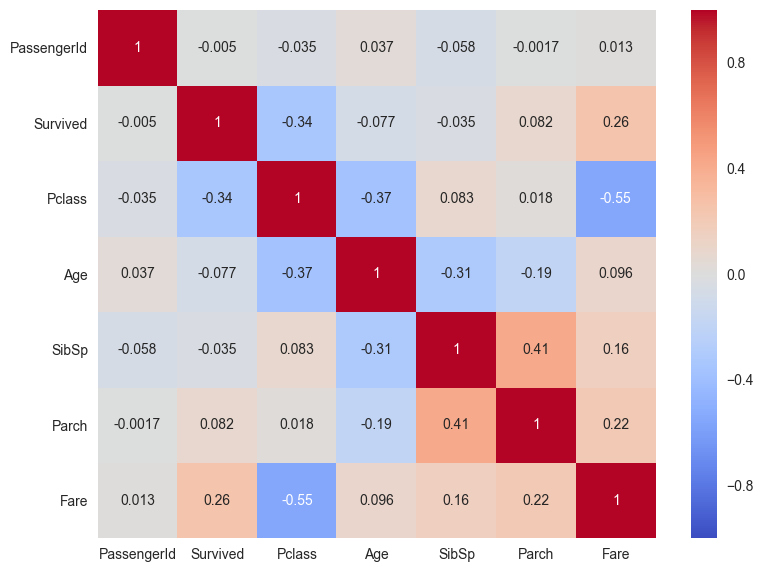

In [14]:
# A heatmap of correlation may give us a understanding of which variables are important
plt.figure(figsize=(9,7), dpi=100)
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm")

** As expected, there is a high correlation between Pclass & Fare. **

### Pclass <a name="pclass"></a>

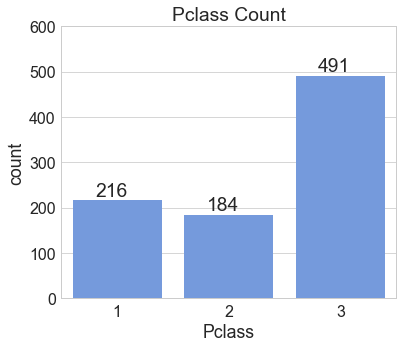

In [15]:
sns.set_style('whitegrid')
sns.set_context(context="paper", font_scale=2)
plt.figure (figsize=(6,5))
ax = sns.countplot(df_train["Pclass"],color="cornflowerblue")
ax.set_title("Pclass Count")
ax.set_ylim([0,600])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+10))

** Let's see whether Pclass affects our response.**

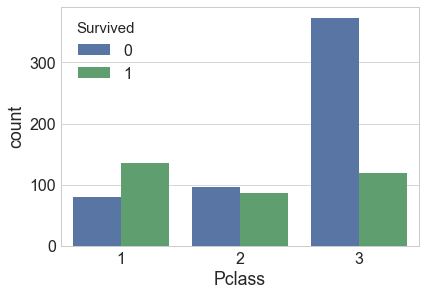

In [16]:
sns.countplot(df_train["Pclass"], hue=df_train["Survived"])

** Instead of plotting the absolute count of 1 and 0 for Survived for the different classes, it's more useful to plot the percentages of Survived for each of them, this way we can easily compare them. **

In [17]:
df_train.groupby(["Pclass", "Survived"]).count()["PassengerId"]

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

In [18]:
sub_df=df_train.groupby(["Pclass", "Survived"]).count()["PassengerId"]
per_ns = [] # list that contains the percentage of non-survivals for each group
per_sur = [] # list that contains the percentage of survivals for each group
for i in sub_df.index.levels[0]:
    if len(sub_df[i]) > 1:
        per_ns.append(sub_df[i][0]/(sub_df[i][0] + sub_df[i][1]))
        per_sur.append(sub_df[i][1]/(sub_df[i][0] + sub_df[i][1]))
    elif sub_df[i].index[0] == 0: # If the only index is 0 then all entries correspond to deaths
        per_ns.append(1)
        per_sur.append(0)
    else: # If the only index is 1 then all entries correspond to survivals
        per_ns.append(0)
        per_sur.append(1)
per_ns=np.array(per_ns)
per_sur=np.array(per_sur)

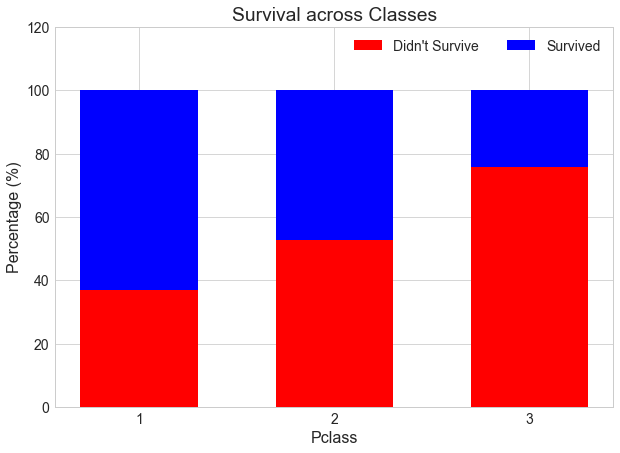

In [19]:
plt.figure (figsize=(10,7))

N = 3  # number of groups
ind = np.arange(1,N+1)
p1 = plt.bar(ind, per_ns*100, width=0.6, color='r')
p2 = plt.bar(ind, per_sur*100, width=0.6, bottom=per_ns*100, color='b')

plt.ylim([0,120])
plt.yticks(fontsize=14)
plt.ylabel('Percentage (%)', fontsize=16)
plt.xticks(ind, fontsize=14)
plt.xlabel('Pclass', fontsize=16)
plt.title("Survival across Classes")
plt.legend((p1[0], p2[0]), ("Didn't Survive", "Survived"), fontsize=14, ncol=4, framealpha=0, fancybox=True)

**It seems like passengers from higher classes have a higher probability of survival, this is coherent with the correlation matrix.
Most people from first class survived (63% survival rate), whereas most people from third class didn’t (24% survival rate).**

### Sex <a name="sex_eda"></a>

**Raw counts**

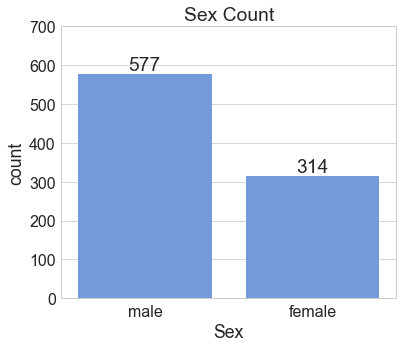

In [20]:
sns.set_style('whitegrid')
sns.set_context(context="paper", font_scale=2)
plt.figure (figsize=(6,5))
ax = sns.countplot(df_train["Sex"],color="cornflowerblue")
ax.set_title("Sex Count")
ax.set_ylim([0,700])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))

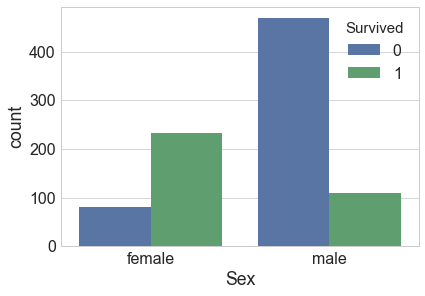

In [21]:
sns.countplot(df_train["Sex"].sort_values(), hue=df_train["Survived"])

More men died in raw counts, however, more females survived in raw counts.

**Survival rates**

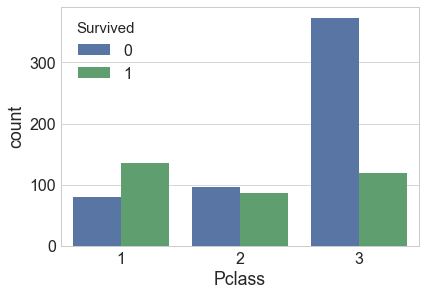

In [22]:
sns.countplot(df_train["Pclass"], hue=df_train["Survived"])

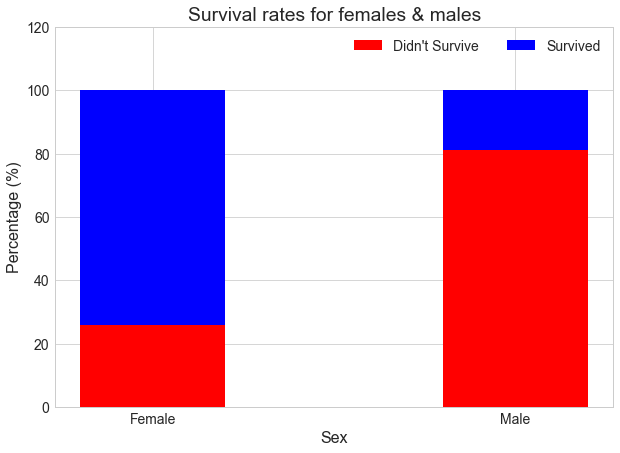

In [23]:
sub_df=df_train.groupby(["Sex", "Survived"]).count()["PassengerId"]
per_ns = [] # list that contains the percentage of non-survivals for each group
per_sur = [] # list that contains the percentage of survivals for each group
for i in sub_df.index.levels[0]:
    if len(sub_df[i]) > 1:
        per_ns.append(sub_df[i][0]/(sub_df[i][0] + sub_df[i][1]))
        per_sur.append(sub_df[i][1]/(sub_df[i][0] + sub_df[i][1]))
    elif sub_df[i].index[0] == 0: # If the only index is 0 then all entries correspond to deaths
        per_ns.append(1)
        per_sur.append(0)
    else: # If the only index is 1 then all entries correspond to survivals
        per_ns.append(0)
        per_sur.append(1)
per_ns=np.array(per_ns)
per_sur=np.array(per_sur)

plt.figure (figsize=(10,7))

N = 2  # number of groups
ind = np.arange(1,N+1)
p1 = plt.bar(ind, per_ns*100, width=0.4, color='r')
p2 = plt.bar(ind, per_sur*100, width=0.4, bottom=per_ns*100, color='b')

plt.ylim([0,120])
plt.yticks(fontsize=14)
plt.ylabel('Percentage (%)', fontsize=16)
plt.xticks(ind, fontsize=14)
plt.xticks(ind, ["Female","Male"])
plt.xlabel('Sex', fontsize=16)
plt.title("Survival rates for females & males")
plt.legend((p1[0], p2[0]), ("Didn't Survive", "Survived"), fontsize=14, ncol=4, framealpha=0, fancybox=True)

In [24]:
df_train.groupby(["Sex", "Survived"]).count()["PassengerId"]

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

**Seeing these graphs it’s clear that females had a greater survival rate proportionally (74.2%), than men (18.9%)**

### Embarked <a name="embark"></a>

**Raw counts**

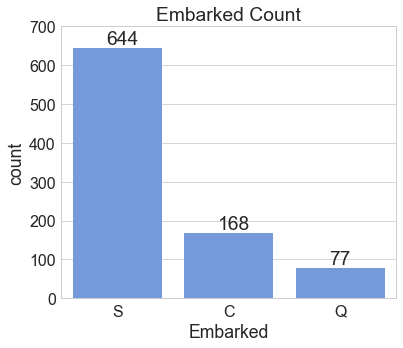

In [25]:
sns.set_context(context="paper", font_scale=2)
plt.figure (figsize=(6,5))
ax = sns.countplot(df_train["Embarked"],color="cornflowerblue")
ax.set_title("Embarked Count")
ax.set_ylim([0,700])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))

**By far the most common embark port is S.**

**Survival rates**

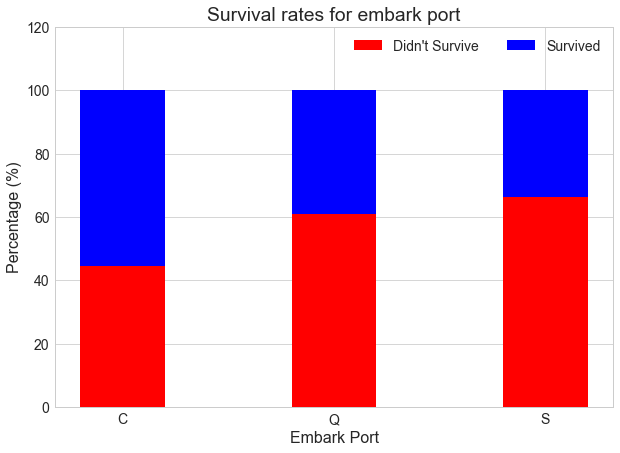

In [26]:
sub_df=df_train.groupby(["Embarked", "Survived"]).count()["PassengerId"]
per_ns = [] # list that contains the percentage of non-survivals for each group
per_sur = [] # list that contains the percentage of survivals for each group
for i in sub_df.index.levels[0]:
    if len(sub_df[i]) > 1:
        per_ns.append(sub_df[i][0]/(sub_df[i][0] + sub_df[i][1]))
        per_sur.append(sub_df[i][1]/(sub_df[i][0] + sub_df[i][1]))
    elif sub_df[i].index[0] == 0: # If the only index is 0 then all entries correspond to deaths
        per_ns.append(1)
        per_sur.append(0)
    else: # If the only index is 1 then all entries correspond to survivals
        per_ns.append(0)
        per_sur.append(1)
per_ns=np.array(per_ns)
per_sur=np.array(per_sur)

plt.figure (figsize=(10,7))

N = 3  # number of groups
ind = np.arange(1,N+1)
p1 = plt.bar(ind, per_ns*100, width=0.4, color='r')
p2 = plt.bar(ind, per_sur*100, width=0.4, bottom=per_ns*100, color='b')

plt.ylim([0,120])
plt.yticks(fontsize=14)
plt.ylabel('Percentage (%)', fontsize=16)
plt.xticks(ind, fontsize=14)
plt.xticks(ind, ["C","Q", "S"])
plt.xlabel('Embark Port', fontsize=16)
plt.title("Survival rates for embark port")
plt.legend((p1[0], p2[0]), ("Didn't Survive", "Survived"), fontsize=14, ncol=4, framealpha=0, fancybox=True)

**Port C has the highest survival rate (55.4%), port S the lowest (33.7%).**

In [27]:
df_train.groupby(["Embarked", "Survived"]).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

### Age <a name="age_eda"></a>

**First let’s take a look at the age distribution**

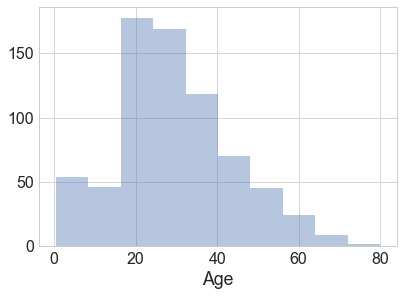

In [28]:
# Age distribution
sns.distplot(df_train["Age"].dropna(), kde=False, bins=10)

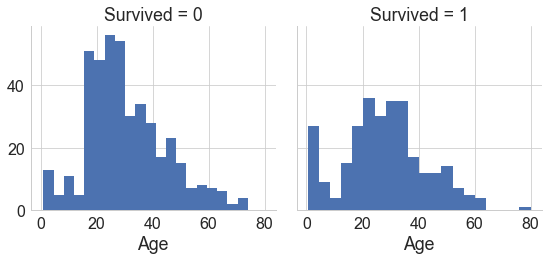

In [29]:
# Distributions of Age of passangers who survived and didn't survive
h = sns.FacetGrid(df_train, col='Survived', size=4)
h.map(plt.hist, 'Age', bins=20)

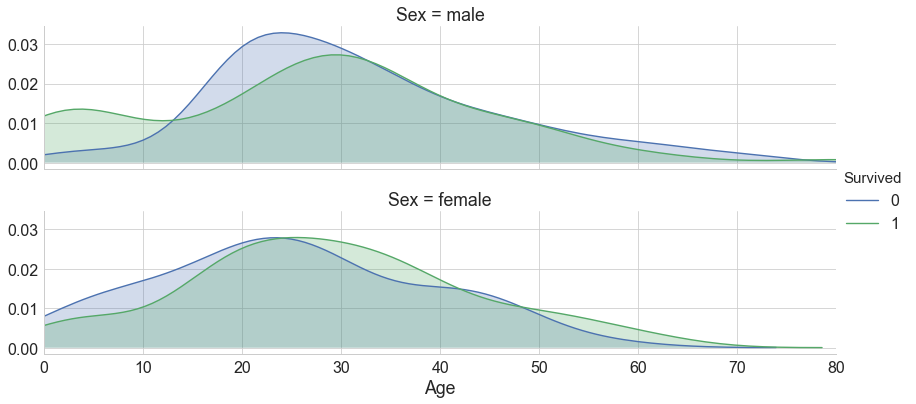

In [30]:
# Distributions of Age of passangers who survived or did not survive by sex
plot_distribution( df_train , var = 'Age' , target = 'Survived', row = 'Sex'  )

**Here we see that the age distribution changes depending on the response. If the two lines had been about the same, then it would not have been a good variable for our predictive model.**

From these graphs we can conclude the following:
* Most passengers are in the 15-35 age range.
* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.

**Finally let's create a boxplot of the data:**

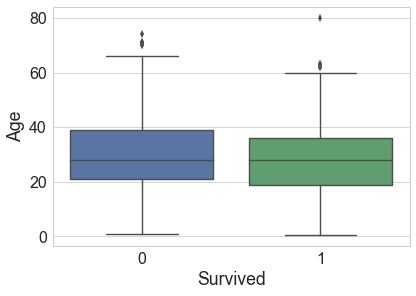

In [31]:
sns.boxplot("Survived", "Age", data=df_train)

### Fare <a name="fare_eda"></a>

**First let’s take a look at the fare distribution**

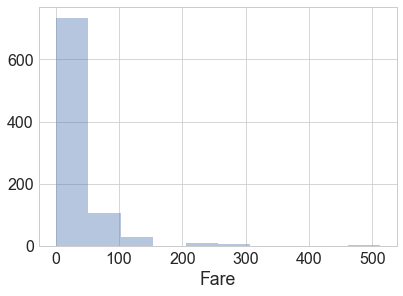

In [32]:
# Fare distribution
sns.distplot(df_train["Fare"].dropna(), kde=False, bins=10)

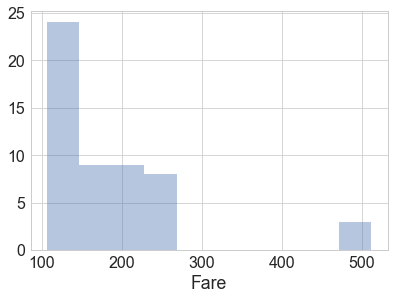

In [33]:
# Fare > 100
sns.distplot(df_train[df_train["Fare"]>100]["Fare"], kde=False, bins=10)

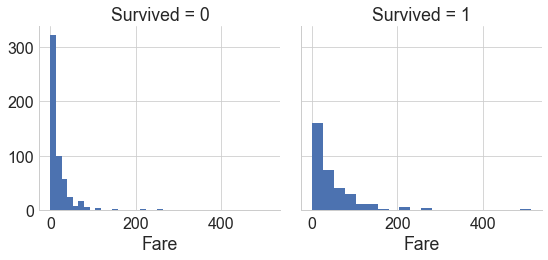

In [34]:
# Distributions of Fare of passangers who survived and didn't survive
h = sns.FacetGrid(df_train, col='Survived', size=4)
h.map(plt.hist, 'Fare', bins=20)

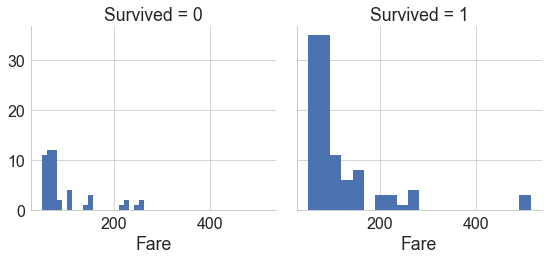

In [35]:
# Distributions of Fare of passangers who survived and didn't survive (Fare>50)
h = sns.FacetGrid(df_train[df_train["Fare"]>50], col='Survived', size=4)
h.map(plt.hist, 'Fare', bins=20)

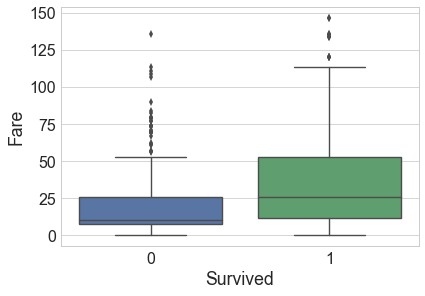

In [36]:
sns.boxplot("Survived", "Fare", data=df_train[df_train["Fare"]<150])

**It seems like the probability of survival increases when the fare increases, this makes sense because higher classes have higher fares, and as we saw before, higher probabilities of survival. We also saw that there is correlation between Fare and Pclass in the correlation matrix.
**

### SibSp <a name="sibsp"></a>

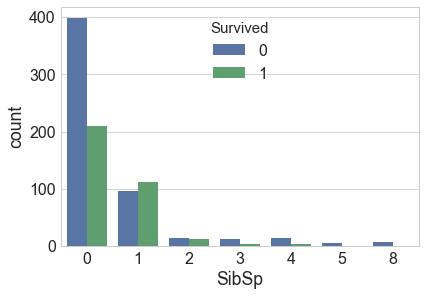

In [37]:
sns.countplot(x="SibSp", data=df_train, hue="Survived")

In [38]:
df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**Passengers with 1 sibling or spouse had the highest survival rate (followed by 2 and 0).**

### Parch <a name="parch"></a>

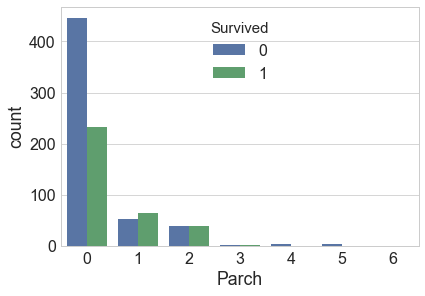

In [39]:
sns.countplot(x="Parch", data=df_train, hue="Survived")

In [40]:
df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Passengers with 3 parents and/or children had the highest survival rate. However, it should be noted that these results could be the consequence of not having enough observations for this case (only 5 passengers had 3 parents and/or children).**
**If we only consider cases with more than 50 observations, then passengers with 1 parent or child had the highest survival rate (followed by 2 and 0, just like for the variable SibSp).**

___
**Now let's analyze the relationship between some of our independent variables**.

### Age & Pclass <a name="age_pclass"></a>

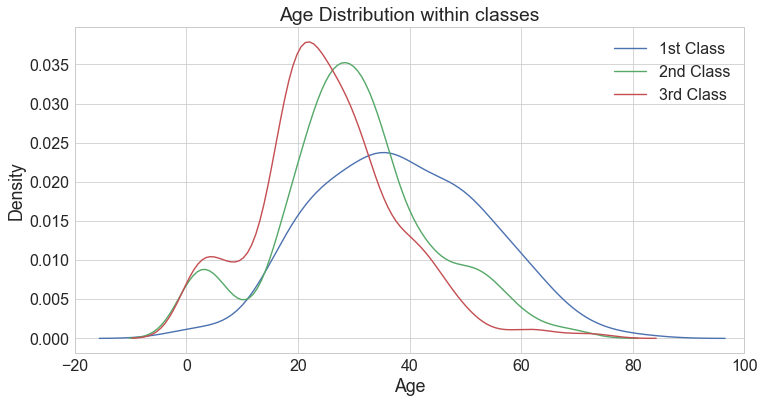

In [41]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
plt.xlim([-20,100])
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution within classes")
ax=sns.kdeplot(df_train[df_train["Pclass"]==1]["Age"],label="1st Class")
sns.kdeplot(df_train[df_train["Pclass"]==2]["Age"], label="2nd Class")
sns.kdeplot(df_train[df_train["Pclass"]==3]["Age"], label="3rd Class")
ax.legend()

**Here we can see that passengers from higher classes tend to be older.**

### Breakdown of survival  by Sex & Pclass <a name="sex_pclass"></a>

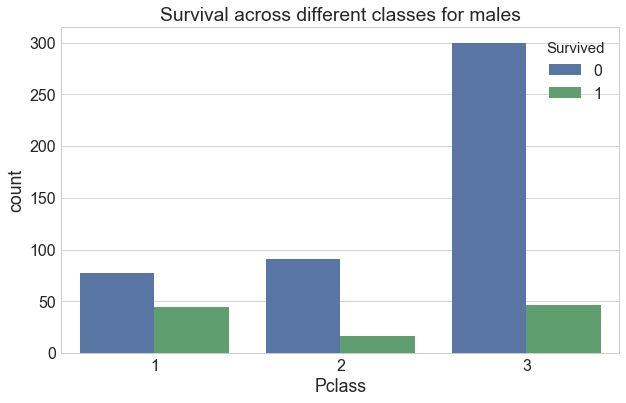

In [42]:
plt.figure(figsize=(10,6))
plt.title("Survival across different classes for males")
sns.countplot(df_train[df_train["Sex"]=="male"]["Pclass"], hue=df_train["Survived"])

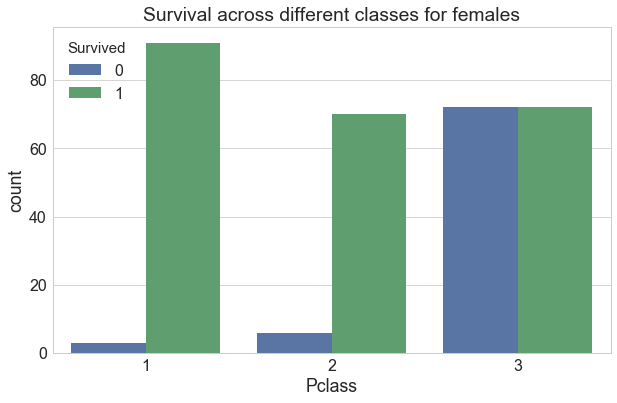

In [43]:
plt.figure(figsize=(10,6))
plt.title("Survival across different classes for females")
sns.countplot(df_train[df_train["Sex"]=="female"]["Pclass"], hue=df_train["Survived"])

**It's clear from these graphs that females from 1st and 2nd class have by far the highest survival rate (91 out of 94 females from 1st class survived).**

In [44]:
df_train.groupby(["Sex","Pclass", "Survived"]).size()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
dtype: int64

## 6. Data Preparation <a name="dpw"></a>

### Dealing with missing values  <a name="missingval"></a>

**As we saw before, some of the features contain missing values, one easy way of visualizing this is with a heatmap:**

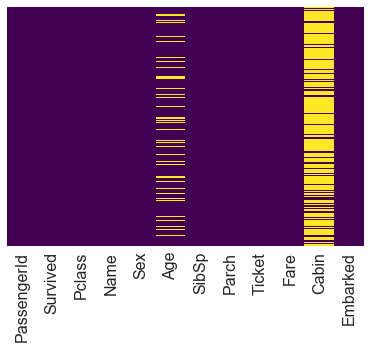

In [45]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar = False, cmap="viridis")

**Approximately  20% of the Age data is missing. The proportion of Age data missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. **

In [46]:
df_train.drop('Cabin', axis=1, inplace=True)

**As we saw before, wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.**

In [47]:
def fill_mean(cols):
    
    pclass = cols[0]
    age = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1: return df_train[df_train["Pclass"]==1]["Age"].mean()
        if pclass == 2: return df_train[df_train["Pclass"]==2]["Age"].mean()
        if pclass == 3: return df_train[df_train["Pclass"]==3]["Age"].mean()
    
    else:
        return age

In [48]:
df_train["Age"] = df_train[["Pclass", "Age"]].apply(fill_mean, axis=1)

In [49]:
#Finally let's drop the 2 rows with missing values for Embarked
df_train.dropna(inplace=True)

In [50]:
#The resulting dataframe has no missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [51]:
#Before moving to the next step let's drop the ticket column as we'll not use it in our analysis.
df_train.drop('Ticket', axis=1, inplace=True)

In [52]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Converting Categorical Features  <a name="dummy"></a>

**We need to convert categorical features to dummy variables. Otherwise our machine learning algorithms won't be able to directly take in those features as inputs.**

In [53]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)
pclass = pd.get_dummies( df_train['Pclass'], drop_first=True)

In [54]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


### Feature Engineering <a name="feateng"></a>

**Let's extract the titles from the passengers names, titles reflect social status and may predict survival probability**

In [55]:
title = pd.DataFrame()
# Extract the title from each name
title[ 'Title' ] = df_train['Name'].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# create a dictionary of the most common titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }

# map each title
title['Title'] = title['Title'].map(Title_Dictionary )
title = pd.get_dummies(title['Title'], drop_first=True) # drop first (in this case "Master") to get k-1 dummies
title.head()

,Miss,Mr,Mrs,Officer,Royalty
0,0,1,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


### Assemble training dataset for modelling <a name="atdm"></a>

**Here we select the features we'll use for modelling, and assemble a dataset with all of them.**

In [56]:
train = pd.concat([df_train, sex, embark, title], axis=1)
train.drop(["Pclass", "Name", "Sex", "Embarked", "PassengerId"], axis=1, inplace=True)
train[["2nd Class", "3rd Class"]] = pclass

In [57]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Officer,Royalty,2nd Class,3rd Class
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,0,0,0,0,1


In [58]:
X_train_valid = train.drop("Survived", axis=1)
y_train_valid = train["Survived"]

## 7. Feature Selection <a name="featsel"></a>

**Let's start by splitting our data into a train set and a validation set:**

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.33)

print (X_train.shape , X_valid.shape)

(595, 14) (294, 14)


**Let's apply recursive feature elimination with cross-validation to select the features for our model:**

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

log_model = LogisticRegression()

In [61]:
rfecv = RFECV(estimator=log_model, step=1, cv=10, scoring='accuracy') # Select model
rfecv.fit(X_train, y_train)

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [62]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 13


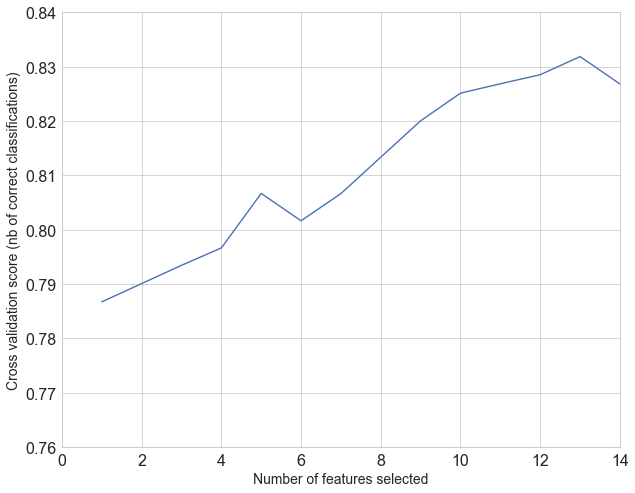

In [63]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,8))
plt.xlim([0,14])
plt.ylim([0.76,0.84])
plt.xlabel("Number of features selected", fontsize=14)
plt.ylabel("Cross validation score (nb of correct classifications)", fontsize=14)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [64]:
rfecv.grid_scores_

array([ 0.78673659,  0.79009818,  0.79345976,  0.79665463,  0.8066838 ,
        0.80165555,  0.80665648,  0.81335139,  0.82004631,  0.82513105,
        0.82685422,  0.82852089,  0.83185514,  0.82682597])

In [65]:
rfecv.ranking_

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
features = pd.Series(X_train.columns)
selected_features = features[(rfecv.support_)] #Features to use in our logistic regression model

## 8. Model Fitting & Performance on Validation Set<a name="mfit"></a>

### Logistic Regression <a name="log_model"></a>

In [67]:
log_model = LogisticRegression()
log_model.fit(X_train[selected_features], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
pred_valid = log_model.predict(X_valid[selected_features])

**Let's print the confusion matrix and classification report for our validation and training sets**

In [70]:
print(confusion_matrix(y_valid, pred_valid))

[[158  27]
 [ 31  78]]


In [71]:
print(classification_report(y_valid, pred_valid))

             precision    recall  f1-score   support

          0       0.84      0.85      0.84       185
          1       0.74      0.72      0.73       109

avg / total       0.80      0.80      0.80       294



In [72]:
pred_train = log_model.predict(X_train[selected_features])

In [73]:
print(classification_report(y_train, pred_train))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87       364
          1       0.83      0.73      0.77       231

avg / total       0.83      0.84      0.83       595



**We can evaluate the accuracy of the model by using the validation set where we know the actual outcome. This dataset has not been used for model training, so it's completely new to the model. **

**We are more interested in how the model performs with previously unseen data (such as our validation data) instead of how it performs in our training data (because we already know the outcome of our training data, what we want is to be able to use our model to predict the outcome of new observations, and the training error may be quite different to the validation set error). In summary, a good classifier is one for which the validation error is smallest.**

**We then compare this accuracy score with the accuracy when using the model on the training data, if the validation error is much larger than the training error this is an indication of overfitting (which essentially means that our model follows the error or noise of our training data too closely). We try to avoid this because it means the model will not generalize well to new data and is expected to perform poorly.**

In [74]:
log_model.score(X_train[selected_features], y_train)

0.83529411764705885

In [75]:
log_model.score(X_valid[selected_features], y_valid)

0.80272108843537415

**The difference between the validation accuracy and the training accuracy is small and is not indicative of overfitting.**

**Now we train the model on the full dataset**

In [76]:
log_model.fit(X_train_valid[selected_features], y_train_valid)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

_________
### Support Vector Machines <a name="svm_model"></a>

In [77]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

**Let's perform a grid search to find the best combination of values for C and gamma (from those in the "parameters" dictionary).**

In [78]:
parameters = {'C': [0.1, 1, 10, 1000, 1e4], 'gamma': [1, 0.1, 0.01, 0.001, 1e-4, 1e-5], 'kernel': ['rbf']}
svm_model = GridSearchCV(SVC(),parameters,refit=True)
svm_model.fit(X_train[selected_features],y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 1000, 10000.0], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [79]:
svm_model.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

**Let's evaluate the model**

In [80]:
pred_valid_svm = svm_model.predict(X_valid[selected_features])

In [81]:
print(confusion_matrix(y_valid, pred_valid_svm))

[[158  27]
 [ 32  77]]


In [82]:
print(classification_report(y_valid, pred_valid_svm))

             precision    recall  f1-score   support

          0       0.83      0.85      0.84       185
          1       0.74      0.71      0.72       109

avg / total       0.80      0.80      0.80       294



In [83]:
pred_train_svm = svm_model.predict(X_train[selected_features])

In [84]:
print(confusion_matrix(y_train, pred_train_svm))

[[329  35]
 [ 60 171]]


In [85]:
print(classification_report(y_train, pred_train_svm))

             precision    recall  f1-score   support

          0       0.85      0.90      0.87       364
          1       0.83      0.74      0.78       231

avg / total       0.84      0.84      0.84       595



In [86]:
svm_model.score(X_valid[selected_features], y_valid)

0.79931972789115646

**We obtain similar scores using SVM and logistic regression.**

In [87]:
svm_model.fit(X_train_valid[selected_features], y_train_valid)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 1000, 10000.0], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

_________
### Decision Trees <a name="dtree_model"></a>

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train[selected_features],y_train)
# dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

**Model Evaluation**

In [90]:
pred_valid_dtree = dtree_model.predict(X_valid[selected_features])

In [91]:
print(confusion_matrix(y_valid, pred_valid_dtree))

[[139  46]
 [ 31  78]]


In [92]:
print(classification_report(y_valid, pred_valid_dtree))

             precision    recall  f1-score   support

          0       0.82      0.75      0.78       185
          1       0.63      0.72      0.67       109

avg / total       0.75      0.74      0.74       294



In [93]:
pred_train_dtree = dtree_model.predict(X_train[selected_features])

In [94]:
print(confusion_matrix(y_train, pred_train_dtree))

[[358   6]
 [ 25 206]]


In [95]:
print(classification_report(y_train, pred_train_dtree))

             precision    recall  f1-score   support

          0       0.93      0.98      0.96       364
          1       0.97      0.89      0.93       231

avg / total       0.95      0.95      0.95       595



In [96]:
dtree_model.score(X_valid[selected_features], y_valid)

0.73809523809523814

** We can clearly see that the decision tree model overfits the data (validation set error much higher than training error).**

In [97]:
dtree_model.fit(X_train_valid[selected_features], y_train_valid)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

_________
### Random Forest <a name="rfc_model"></a>

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

**Let's perform a grid search to find the best combination of parameters for our model:**

In [99]:
# Parameter combinations to try
parameters = {'n_estimators': [10, 100], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }
acc_scorer = make_scorer(accuracy_score) # Type of scoring used to compare parameter combinations

In [100]:
rfc_model = GridSearchCV(RandomForestClassifier(), parameters, scoring=acc_scorer)

In [101]:
#rfc_model.fit(X_train,y_train)
rfc_model.fit(X_train[selected_features],y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100], 'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [102]:
rfc_model.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

**Model Evaluation**

In [103]:
#pred_valid_rfc = rfc_model.predict(X_valid)
pred_valid_rfc = rfc_model.predict(X_valid[selected_features])

In [104]:
print(confusion_matrix(y_valid, pred_valid_rfc))

[[159  26]
 [ 29  80]]


In [105]:
print(classification_report(y_valid, pred_valid_rfc))

             precision    recall  f1-score   support

          0       0.85      0.86      0.85       185
          1       0.75      0.73      0.74       109

avg / total       0.81      0.81      0.81       294



In [106]:
pred_train_rfc = rfc_model.predict(X_train[selected_features])

In [107]:
print(confusion_matrix(y_train, pred_train_rfc))

[[332  32]
 [ 59 172]]


In [108]:
print(classification_report(y_train, pred_train_rfc))

             precision    recall  f1-score   support

          0       0.85      0.91      0.88       364
          1       0.84      0.74      0.79       231

avg / total       0.85      0.85      0.85       595



In [109]:
rfc_model.score(X_valid[selected_features], y_valid)

0.81292517006802723

In [110]:
rfc_model.fit(X_train_valid[selected_features], y_train_valid)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100], 'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(accuracy_score), verbose=0)

_________
###  K-nearest neighbors <a name="knn_model"></a>

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
# Parameter combinations to try
parameters_knn = {'n_neighbors':[1,3,5,8,10,15,30,50]}

In [113]:
knn_model = GridSearchCV(KNeighborsClassifier(), parameters_knn, scoring=acc_scorer)

In [114]:
knn_model.fit(X_train[selected_features],y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 8, 10, 15, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [115]:
knn_model.best_params_

{'n_neighbors': 3}

**Model Evaluation**

In [116]:
pred_valid_knn = knn_model.predict(X_valid[selected_features])

In [117]:
print(confusion_matrix(y_valid, pred_valid_knn))

[[159  26]
 [ 34  75]]


In [118]:
print(classification_report(y_valid, pred_valid_knn))

             precision    recall  f1-score   support

          0       0.82      0.86      0.84       185
          1       0.74      0.69      0.71       109

avg / total       0.79      0.80      0.79       294



In [119]:
pred_train_knn = knn_model.predict(X_train[selected_features])

In [120]:
print(confusion_matrix(y_train, pred_train_knn))

[[340  24]
 [ 43 188]]


In [121]:
print(classification_report(y_train, pred_train_knn))

             precision    recall  f1-score   support

          0       0.89      0.93      0.91       364
          1       0.89      0.81      0.85       231

avg / total       0.89      0.89      0.89       595



In [122]:
knn_model.fit(X_train_valid[selected_features], y_train_valid)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 8, 10, 15, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(accuracy_score), verbose=0)

_________
###  Cross-validation <a name="kfcv"></a>

**We can use cross-validation to perform a more rigorous evaluation of our models**

In [123]:
model_cv = rfc_model.best_estimator_ # Select model (.best_estimator_ is used for models that use grid search)
X_all = X_train_valid[selected_features]
y_all = y_train_valid
def run_kfold(model_cv):
    kf = KFold(n_splits=9)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X_all):
        fold += 1
        X_train_cv, X_test_cv = X_all.values[train_index], X_all.values[test_index]
        y_train_cv, y_test_cv = y_all.values[train_index], y_all.values[test_index]
        model_cv.fit(X_train_cv, y_train_cv)
        predictions_cv = model_cv.predict(X_test_cv)
        accuracy_cv = accuracy_score(y_test_cv, predictions_cv)
        outcomes.append(accuracy_cv)
        print("Fold {0} accuracy: {1}".format(fold, accuracy_cv))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))

run_kfold(model_cv)

Fold 1 accuracy: 0.7878787878787878
Fold 2 accuracy: 0.8686868686868687
Fold 3 accuracy: 0.7575757575757576
Fold 4 accuracy: 0.8686868686868687
Fold 5 accuracy: 0.8181818181818182
Fold 6 accuracy: 0.7878787878787878
Fold 7 accuracy: 0.7373737373737373
Fold 8 accuracy: 0.8469387755102041
Fold 9 accuracy: 0.8469387755102041
Mean Accuracy: 0.8133489085870038


## 9. Prepare Submission <a name="submiss"></a>

**In this final step, we make the predictions on the test dataset, create a CSV file, and upload the results to Kaggle.**

In [124]:
df_test = pd.read_csv('test.csv')

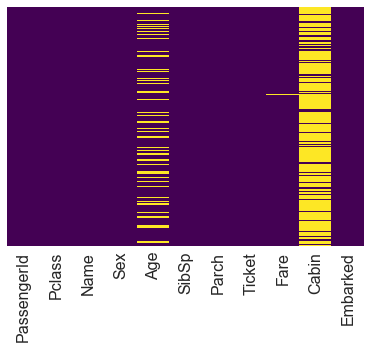

In [125]:
sns.heatmap(df_test.isnull(), yticklabels=False, cbar = False, cmap="viridis")

In [126]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [127]:
df_test.drop('Cabin', axis=1, inplace=True)

In [128]:
def fill_meant(cols):
    
    pclass = cols[0]
    age = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1: return df_test[df_test["Pclass"]==1]["Age"].mean()
        if pclass == 2: return df_test[df_test["Pclass"]==2]["Age"].mean()
        if pclass == 3: return df_test[df_test["Pclass"]==3]["Age"].mean()
    
    else:
        return age

df_test["Age"] = df_test[["Pclass", "Age"]].apply(fill_meant, axis=1)

In [129]:
df_test["Embarked"].fillna("S", inplace=True)

In [130]:
df_test[df_test["Fare"].isnull()] # Missing fare belongs to passenger in 3rd class

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [131]:
# This code fills the missing fare value with the mean fare for 3rd class
df_test["Fare"].fillna(df_test[df_test["Pclass"]==3]["Fare"].mean(), inplace=True)

In [132]:
df_test.drop('Ticket', axis=1, inplace=True)

In [133]:
sex_test= pd.get_dummies(df_test['Sex'],drop_first=True)
embark_test= pd.get_dummies(df_test['Embarked'],drop_first=True)
pclass_test= pd.get_dummies( df_test['Pclass'], drop_first=True)

In [134]:
title_test = pd.DataFrame()
# Extract the title from each name
title_test[ 'Title' ] = df_test['Name'].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# create a dictionary of the most common titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }

# map each title
title_test['Title'] = title_test['Title'].map(Title_Dictionary )
title_test = pd.get_dummies(title_test['Title'], drop_first=True) # drop first (in this case "Master") to get k-1 dummies
title_test.head()


,Miss,Mr,Mrs,Officer,Royalty
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [135]:
test = pd.concat([df_test, sex_test, embark_test, title_test], axis=1)
test.drop(["Pclass", "Name", "Sex", "Embarked", "PassengerId"], axis=1, inplace=True)
test[["2nd Class", "3rd Class"]] = pclass_test

In [136]:
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Officer,Royalty,2nd Class,3rd Class
0,34.5,0,0,7.8292,1,1,0,0,1,0,0,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,0,1,0,0,0,1
2,62.0,0,0,9.6875,1,1,0,0,1,0,0,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1,0,0,0,0,1
4,22.0,1,1,12.2875,0,0,1,0,0,1,0,0,0,1


In [137]:
X_test = test[selected_features]

In [138]:
model = rfc_model # Select model

In [139]:
predict_test = model.predict(X_test)
# predict_test = model.predict(test)

In [140]:
submission = pd.DataFrame( { 'PassengerId': df_test["PassengerId"] , 'Survived': predict_test } )

In [141]:
submission.to_csv('rfc_model_titanic.csv', index=False)